# Plotting ROC curves with ctaplot

In [1]:
import ctaplot
import numpy as np
import matplotlib.pyplot as plt
ctaplot.set_style()

##  ROC curves
ROC curves are useful to assess the discrimination power of a reconstruction pipeline.     
For IACT, we often only care about gamma events in a one vs all fashion. For that purpose, one can use `ctaplot.plot_roc_curve_gammaness`

In [2]:
def fake_reco_distri(size, good=True):
    """
    Generate a random distribution between 0 and 1.
    If `good==True`, the distribution is shifted towards 1.
    If `good==False`, the distribution is shifted towards 0.
    """
    r0 = np.random.gamma(5, 1, size)
    if good:
        return 1 - r0/r0.max()
    else:
        return r0/r0.max()

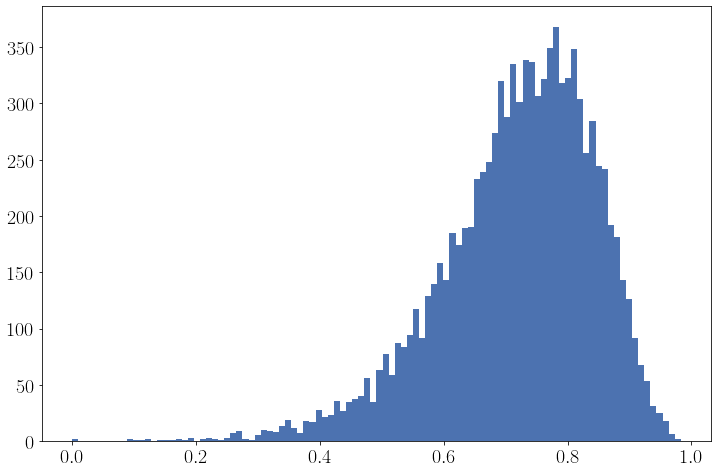

In [3]:
# Example of fake distri:
plt.hist(fake_reco_distri(10000, good=True), bins=100);

In [4]:
# Let's simulate some events. Following the CORSIKA convention, 0 are for gammas, 1 for electrons, 101  for protons.

nb_events = 10000

particles = [0, 1, 101]
mc_type = np.random.choice(particles, size=nb_events)
gammaness = np.empty(nb_events)
gammaness[mc_type==0] = fake_reco_distri(len(mc_type[mc_type==0]), good=True)
gammaness[mc_type!=0] = fake_reco_distri(len(mc_type[mc_type!=0]), good=False)

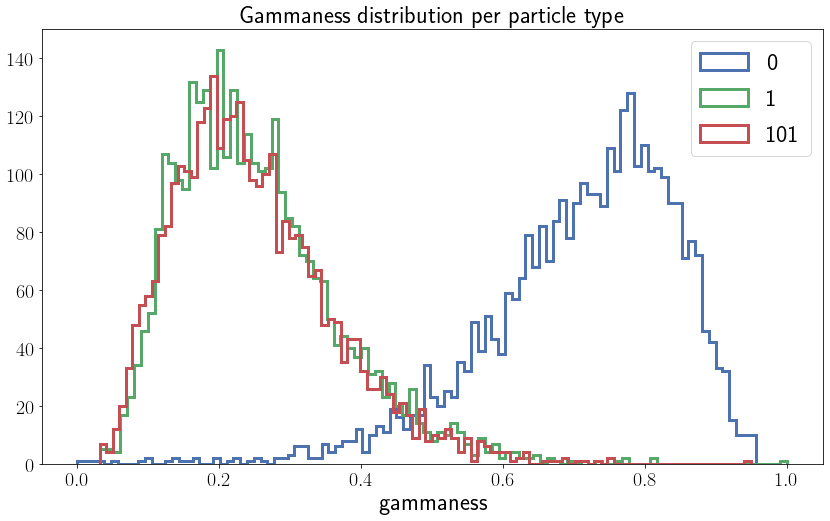

In [5]:
plt.figure(figsize=(14,8))
ax = ctaplot.plot_gammaness_distribution(mc_type, gammaness, bins=100, histtype='step', linewidth=3);

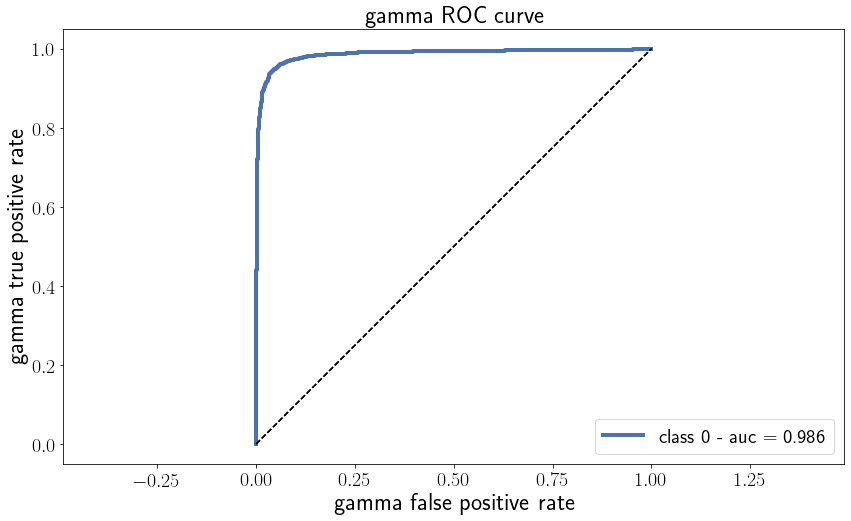

In [6]:
plt.figure(figsize=(14,8))
ax = ctaplot.plot_roc_curve_gammaness(mc_type, gammaness, linewidth=4);
ax.legend(fontsize=20);

### Multiclass ROC curve   
In this case, one needs a reconstruction probability per class.    
The probability should be between 0 and 1.

In [7]:
reco_proba = {}
for p in particles:
    reco_proba[p] = np.ones_like(mc_type, dtype=np.float)
    reco_proba[p][mc_type==p] = fake_reco_distri(len(mc_type[mc_type==p]), good=True)
    reco_proba[p][mc_type!=p] = fake_reco_distri(len(mc_type[mc_type!=p]), good=False)

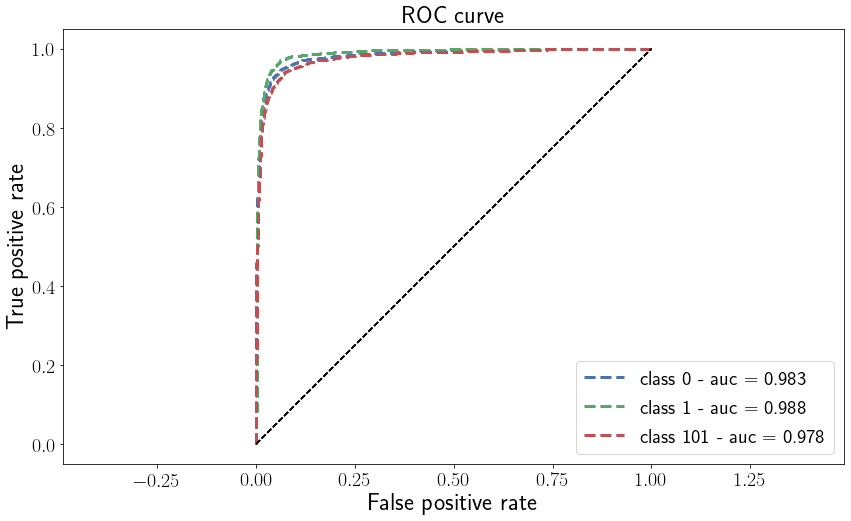

In [8]:
plt.figure(figsize=(14,8))
ax = ctaplot.plot_roc_curve_multiclass(mc_type, reco_proba, linewidth=3, linestyle='--');
ax.legend(fontsize=20);

## ROC curves as a function of the gamma energy

One can evaluate the classification performance as a function of the gamma energy.    
In this case, the AUC is computed for gammas in each band vs **all** non-gammas particles (regardless of their energies). 

In [9]:
# Fake energies between 10GeV and 10TeV:
mc_gamma_energies = 10**(12*np.random.rand(nb_events) - 2)

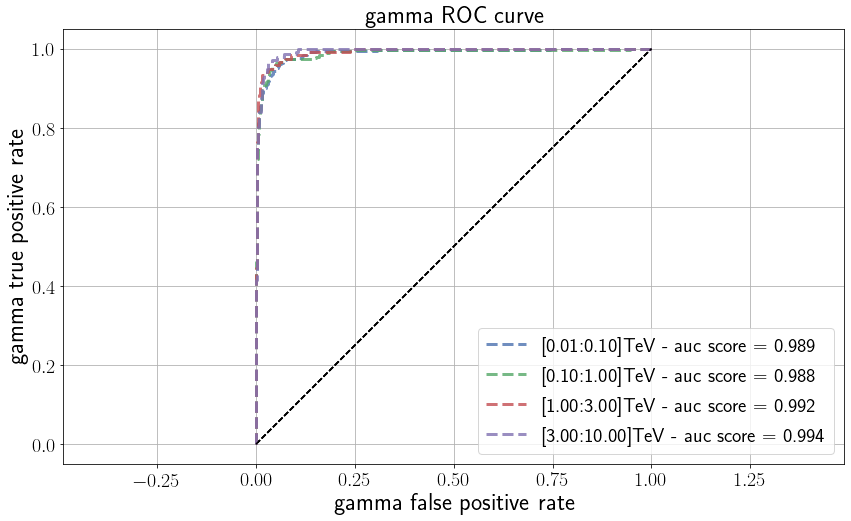

In [10]:
plt.figure(figsize=(14,8))
ax = ctaplot.plot_roc_curve_gammaness_per_energy(mc_type, gammaness, mc_gamma_energies,
                                                 energy_bins=[0.01,0.1,1,3,10],
                                                 linestyle='--',
                                                 alpha=0.8,
                                                 linewidth=3,
                                                );
ax.legend(fontsize=20);